# Linear regression with gradient descent

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. Generate some data

Uniformally sample x from 0 to 1. Generate y from x using a fixed linear transform:
$$
y = 2.5 x + 3
$$
and add some Gaussian noise.

In [21]:
np.random.seed(42)

In [22]:
def generate_data(n=100):
    xs = np.random.rand(n)
    ys = 2.5 * xs + 3.0 + np.random.randn(n) * 0.2
    return xs[:, np.newaxis], ys

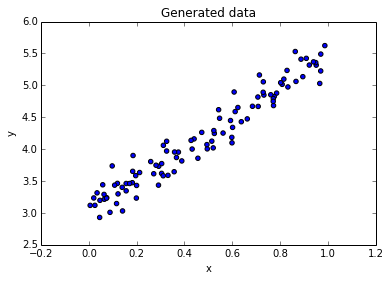

In [23]:
X, y = generate_data()
scatter(X.ravel(), y)
title('Generated data')
xlabel('x')
ylabel('y')

## 2. Define the model, loss, and gradient

The model is a linear function:
$$
f(x, w, b) = w^T x + b
$$

We use square (Euclidean) loss:
$$
L = \frac{1}{2N} \sum_{i=1}^{N} (f(x_i) - y_i)^2
$$

The gradient of $L$ wrt. $w$ is:
$$
\Delta_w L = \frac{1}{N} \sum_{i=1}^{N} (f(x_i) - y_i) x_i
$$

And wrt. the bias:
$$
\Delta_b L = \frac{1}{N} \sum_{i=1}^{N} (f(x_i) - y_i) 
$$

In [24]:
def predict(X, w, b):
    return np.dot(X, w) + b

def mean_square_error(p, y):
    return 0.5 * np.mean((p-y)**2)

def loss(X, y, w, b):
    p = predict(X, w, b)
    return mean_square_error(p, y)

def d_loss(X, y, w, b):
    y = y.ravel()
    p = predict(X, w, b)
    dw = ((p - y)[:, np.newaxis] * X).mean(axis=0)
    db = (p - y).mean()
    return dw, db

## 3. Gradient descent

In [25]:
def gradient_descent_optimize(X, y, loss, d_loss, lr=1e-3, epochs=2000):
    
    # initialize weights and bias
    w = np.zeros(X.shape[1]) 
    b = 1
    
    # set the initial learning rate
    alpha = lr
    
    # save learning curves to losses
    losses = []
    
    for i in range(epochs):
        
        # compute loss
        L = loss(X, y, w, b)
        
        # print loss
        if i % 10 == 0:
            print('Epoch {} Loss: {}'.format(i, L))
            
        # compute gradient of loss wrt parameters
        dw, db = d_loss(X, y, w, b)
        
        # update parameters
        w = w - alpha * dw
        b = b - alpha * db
        
        # save loss
        losses.append(L)
        
    return w, b, losses

Epoch 0 Loss: 5.311218477
Epoch 10 Loss: 0.435240816531
Epoch 20 Loss: 0.0827178676335
Epoch 30 Loss: 0.0527678697662
Epoch 40 Loss: 0.0464127358886
Epoch 50 Loss: 0.0422957158306
Epoch 60 Loss: 0.0388232615013
Epoch 70 Loss: 0.0358177256171
Epoch 80 Loss: 0.0332107091357
Epoch 90 Loss: 0.0309489698596
Epoch 100 Loss: 0.0289867502559
Epoch 110 Loss: 0.0272843832327
Epoch 120 Loss: 0.0258074569195
Epoch 130 Loss: 0.0245261166902
Epoch 140 Loss: 0.0234144615116
Epoch 150 Loss: 0.0224500203681
Epoch 160 Loss: 0.0216132980306
Epoch 170 Loss: 0.0208873809805
Epoch 180 Loss: 0.0202575955187
Epoch 190 Loss: 0.0197112111517
Epoch 200 Loss: 0.0192371832573
Epoch 210 Loss: 0.0188259298277
Epoch 220 Loss: 0.0184691377797
Epoch 230 Loss: 0.0181595949129
Epoch 240 Loss: 0.0178910441229
Epoch 250 Loss: 0.0176580569196
Epoch 260 Loss: 0.017455923696
Epoch 270 Loss: 0.0172805585279
Epoch 280 Loss: 0.0171284165808
Epoch 290 Loss: 0.0169964224551
Epoch 300 Loss: 0.0168819080193
Epoch 310 Loss: 0.0167825

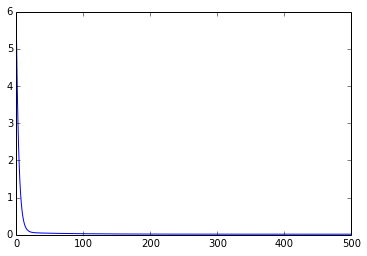

In [26]:
w, b, losses = gradient_descent_optimize(X, y, loss, d_loss, lr=0.1, epochs=500)
plot(losses)

In [27]:
print w, b

[ 2.37666051] 3.05889975013


## 4. Plot the regression line

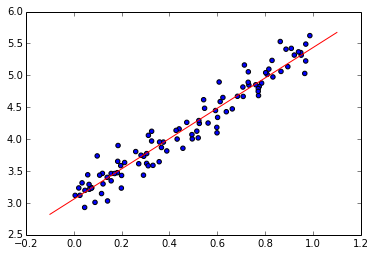

In [28]:
scatter(X.ravel(), y)

def plotline(w, b, x0, x1):
    y0 = w * x0 + b
    y1 = w * x1 + b
    xs = linspace(x0, x1, 100)
    ys = linspace(y0, y1, 100)
    plot(xs, ys, 'r')
    
plotline(w, b, -0.1, 1.1)